# Setting up env

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Create figs folder if it doesn't exist
if not os.path.exists('figs'):
    os.makedirs('figs')
    print("Created 'figs' folder for LaTeX figures")
else:
    print("'figs' folder already exists")

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

'figs' folder already exists


# question N1 generating data

Synthetic datasets created!
Low noise dataset shape: (200, 3)
High noise dataset shape: (200, 3)


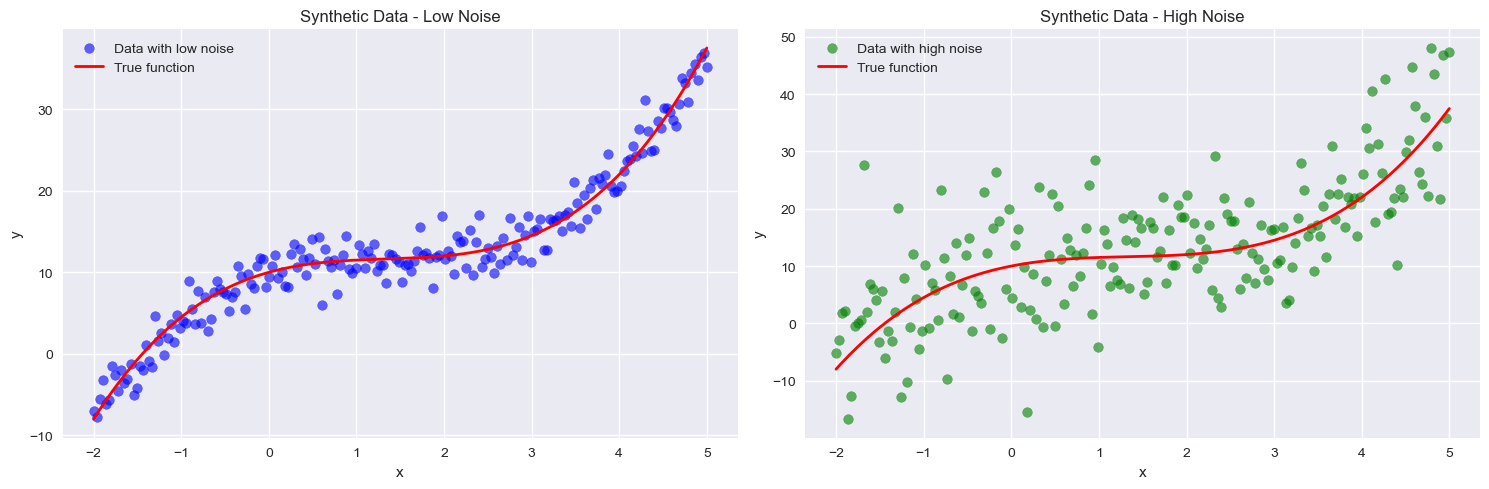

Figure saved as 'figs/synthetic_datasets.png'


In [22]:
# Step 1: Generate synthetic dataset
def true_function(x):
    """The true underlying function without noise"""
    return 0.5*x**3 - 2*x**2 + 3*x + 10

# Generate data
np.random.seed(42)  # For reproducibility
n_samples = 200

# Generate x values between -2 and 5
x = np.linspace(-2, 5, n_samples)

# Calculate true y values (without noise)
y_true = true_function(x)

# Add different levels of noise for experimentation
noise_low = np.random.normal(0, 2, n_samples)  # Low noise
noise_high = np.random.normal(0, 8, n_samples)  # High noise

y_low_noise = y_true + noise_low
y_high_noise = y_true + noise_high

# Create DataFrames for easier handling
df_low = pd.DataFrame({'x': x, 'y': y_low_noise, 'y_true': y_true})
df_high = pd.DataFrame({'x': x, 'y': y_high_noise, 'y_true': y_true})

print("Synthetic datasets created!")
print(f"Low noise dataset shape: {df_low.shape}")
print(f"High noise dataset shape: {df_high.shape}")
# Visualize the synthetic datasets
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot low noise data
axes[0].scatter(df_low['x'], df_low['y'], alpha=0.6, label='Data with low noise', color='blue')
axes[0].plot(df_low['x'], df_low['y_true'], 'r-', linewidth=2, label='True function')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Synthetic Data - Low Noise')
axes[0].legend()
axes[0].grid(True)

# Plot high noise data
axes[1].scatter(df_high['x'], df_high['y'], alpha=0.6, label='Data with high noise', color='green')
axes[1].plot(df_high['x'], df_high['y_true'], 'r-', linewidth=2, label='True function')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Synthetic Data - High Noise')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig('figs/synthetic_datasets.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved as 'figs/synthetic_datasets.png'")

# question N2 adding noise to data, observing effects on lasso and ridge

In [23]:
# Q2: Add noise and observe effects on Ridge and Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Prepare data for both noise levels
X_low = df_low['x'].values.reshape(-1, 1)
y_low = df_low['y'].values
X_high = df_high['x'].values.reshape(-1, 1)
y_high = df_high['y'].values

# Split both datasets
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, test_size=0.2, random_state=42)
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_low_scaled = scaler.fit_transform(X_train_low)
X_test_low_scaled = scaler.transform(X_test_low)
X_train_high_scaled = scaler.fit_transform(X_train_high)
X_test_high_scaled = scaler.transform(X_test_high)

# Test Ridge and Lasso with different alpha values
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Store results
results = []

for alpha in alphas:
    # Ridge Regression
    ridge_low = Ridge(alpha=alpha)
    ridge_high = Ridge(alpha=alpha)
    
    ridge_low.fit(X_train_low_scaled, y_train_low)
    ridge_high.fit(X_train_high_scaled, y_train_high)
    
    # Predictions
    y_pred_ridge_low = ridge_low.predict(X_test_low_scaled)
    y_pred_ridge_high = ridge_high.predict(X_test_high_scaled)
    
    # Calculate MSE
    mse_ridge_low = mean_squared_error(y_test_low, y_pred_ridge_low)
    mse_ridge_high = mean_squared_error(y_test_high, y_pred_ridge_high)
    
    # Lasso Regression
    lasso_low = Lasso(alpha=alpha)
    lasso_high = Lasso(alpha=alpha)
    
    lasso_low.fit(X_train_low_scaled, y_train_low)
    lasso_high.fit(X_train_high_scaled, y_train_high)
    
    # Predictions
    y_pred_lasso_low = lasso_low.predict(X_test_low_scaled)
    y_pred_lasso_high = lasso_high.predict(X_test_high_scaled)
    
    # Calculate MSE
    mse_lasso_low = mean_squared_error(y_test_low, y_pred_lasso_low)
    mse_lasso_high = mean_squared_error(y_test_high, y_pred_lasso_high)
    
    results.append({
        'alpha': alpha,
        'ridge_low_mse': mse_ridge_low,
        'ridge_high_mse': mse_ridge_high,
        'lasso_low_mse': mse_lasso_low,
        'lasso_high_mse': mse_lasso_high
    })

# Create results DataFrame
results_df = pd.DataFrame(results)
print("✅ Noise effects on Ridge and Lasso analyzed")
print(results_df.round(4))



✅ Noise effects on Ridge and Lasso analyzed
     alpha  ridge_low_mse  ridge_high_mse  lasso_low_mse  lasso_high_mse
0    0.001        10.9858         82.3557        10.9839         82.3518
1    0.010        10.9848         82.3536        10.9657         82.3145
2    0.100        10.9747         82.3330        10.7903         81.9486
3    1.000        10.8764         82.1294         9.7120         78.9643
4   10.000        10.1331         80.3954        52.4263        105.2412
5  100.000        12.8572         77.0210        52.4263        105.2412


# implementing and comparing regressions

Linéaire MSE: 50.807
Polynomiale (degree=3) MSE: 19.569
Ridge (alpha=1) MSE: 20.319
Lasso (alpha=1) MSE: 45.549
ElasticNet (alpha=1, l1_ratio=0.5) MSE: 57.012


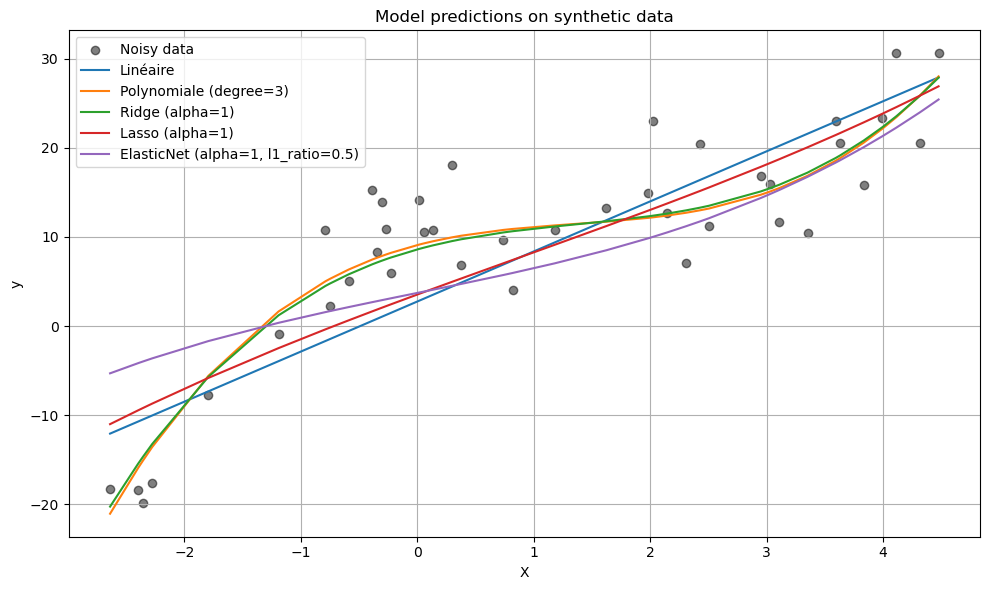

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Create directory for figures if not exists ---
os.makedirs("figs", exist_ok=True)

# --- Create models ---
models = {
    "Linéaire": LinearRegression(),
    "Polynomiale (degree=3)": make_pipeline(
        PolynomialFeatures(degree=3, include_bias=False),
        StandardScaler(),
        LinearRegression()
    ),
    "Ridge (alpha=1)": make_pipeline(
        PolynomialFeatures(degree=3, include_bias=False),
        StandardScaler(),
        Ridge(alpha=1.0, random_state=0)
    ),
    "Lasso (alpha=1)": make_pipeline(
        PolynomialFeatures(degree=3, include_bias=False),
        StandardScaler(),
        Lasso(alpha=1.0, random_state=0, max_iter=10000)
    ),
    "ElasticNet (alpha=1, l1_ratio=0.5)": make_pipeline(
        PolynomialFeatures(degree=3, include_bias=False),
        StandardScaler(),
        ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=0, max_iter=10000)
    )
}

# --- Train, predict, display MSE and collect predictions ---
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {mse:.3f}")

# --- Plot all predictions + noisy data ---
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='black', alpha=0.5, label="Noisy data")
for name, y_pred in predictions.items():
    # Sort X_test for smooth curves
    sorted_idx = np.argsort(X_test.ravel())
    plt.plot(X_test.ravel()[sorted_idx], y_pred.ravel()[sorted_idx], label=name)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Model predictions on synthetic data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figs/synth_models.png", dpi=200)
plt.show()



# Implement and Compare Regression Models

In [24]:
# Q3: Implement and compare Linear, Polynomial, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Use low noise dataset for model comparison
X = df_low['x'].values.reshape(-1, 1)
y = df_low['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (deg=3)': Pipeline([
        ('poly', PolynomialFeatures(degree=3)),
        ('linear', LinearRegression())
    ]),
    'Ridge Regression (alpha=1)': Ridge(alpha=1),
    'Lasso Regression (alpha=0.1)': Lasso(alpha=0.1),
    'ElasticNet (alpha=0.1)': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Train and evaluate models
results = {}
predictions = {}

for name, model in models.items():
    if 'Polynomial' in name:
        # Polynomial regression doesn't need scaling in the pipeline
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R2': r2}
    predictions[name] = y_pred

# Display results
results_df = pd.DataFrame(results).T
print("✅ All regression models implemented and compared")
print(results_df.round(4))

✅ All regression models implemented and compared
                                   MSE      R2
Linear Regression              10.9859  0.7902
Polynomial Regression (deg=3)   3.1311  0.9402
Ridge Regression (alpha=1)     10.8764  0.7923
Lasso Regression (alpha=0.1)   10.7903  0.7940
ElasticNet (alpha=0.1)         10.1992  0.8053


# Coeff

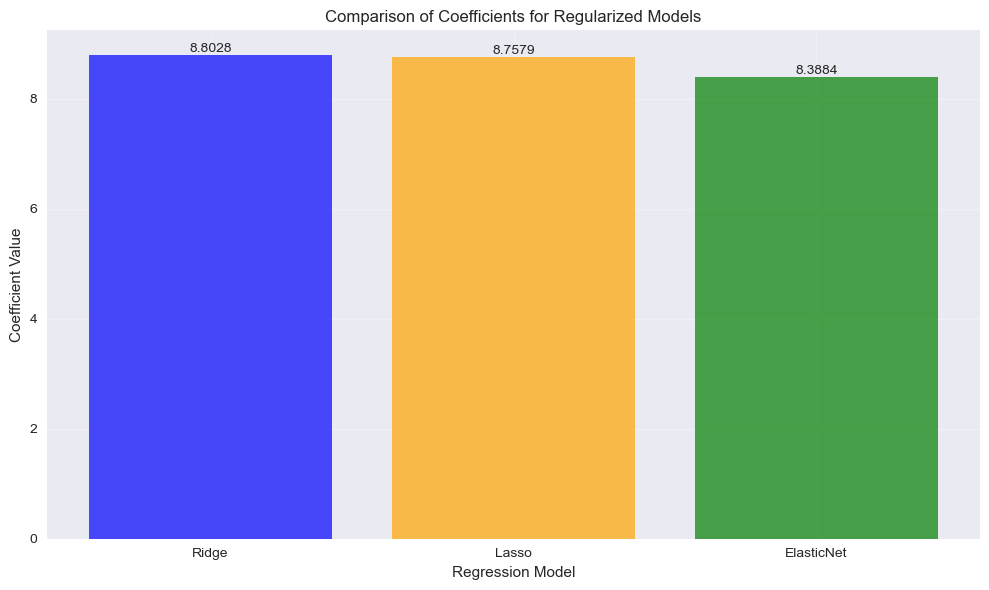

✅ Coefficients visualized and saved

Coefficient values:
Ridge: 8.8028
Lasso: 8.7579
ElasticNet: 8.3884

📊 Interpretation:
• Ridge: Shrinks coefficients but keeps all features
• Lasso: Can drive coefficients to zero (feature selection)
• ElasticNet: Balance between Ridge and Lasso
• Higher noise typically requires stronger regularization


In [26]:
# Q4: Visualize coefficients and interpret differences
import matplotlib.pyplot as plt

# Get coefficients for regularized models
ridge_model = Ridge(alpha=1)
lasso_model = Lasso(alpha=0.1)
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit models
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
elastic_model.fit(X_train_scaled, y_train)

# Get coefficients
coefficients = {
    'Ridge': ridge_model.coef_,
    'Lasso': lasso_model.coef_,
    'ElasticNet': elastic_model.coef_
}

# Create comparison plot
fig, ax = plt.subplots(figsize=(10, 6))

models = list(coefficients.keys())
coef_values = [coef[0] for coef in coefficients.values()]

bars = ax.bar(models, coef_values, color=['blue', 'orange', 'green'], alpha=0.7)

# Add value labels on bars
for bar, value in zip(bars, coef_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:.4f}', ha='center', va='bottom')

ax.set_xlabel('Regression Model')
ax.set_ylabel('Coefficient Value')
ax.set_title('Comparison of Coefficients for Regularized Models')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figs/coefficients_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Coefficients visualized and saved")
print("\nCoefficient values:")
for model, coef in coefficients.items():
    print(f"{model}: {coef[0]:.4f}")

print("\n📊 Interpretation:")
print("• Ridge: Shrinks coefficients but keeps all features")
print("• Lasso: Can drive coefficients to zero (feature selection)")
print("• ElasticNet: Balance between Ridge and Lasso")
print("• Higher noise typically requires stronger regularization")

# Implement ANN Regression with TensorFlow

✅ ANN Model Architecture:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)


🚀 Training ANN model...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

📊 ANN Performance:
Training MSE: 4.1859
Test MSE: 3.4521
Test R²: 0.9341


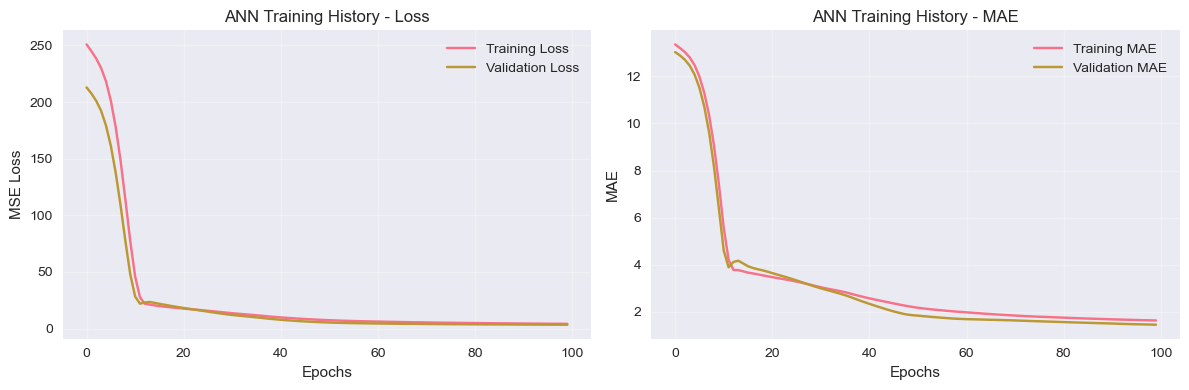

In [27]:
# Q5: Implement ANN Regression with TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Create ANN model
def create_ann_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(1,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])
    return model

# Create and display model
ann_model = create_ann_model()
print("✅ ANN Model Architecture:")
ann_model.summary()

# Train the model
print("\n🚀 Training ANN model...")
history = ann_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test_scaled, y_test),
    verbose=0
)

# Evaluate the model
ann_train_loss, ann_train_mae = ann_model.evaluate(X_train_scaled, y_train, verbose=0)
ann_test_loss, ann_test_mae = ann_model.evaluate(X_test_scaled, y_test, verbose=0)

# Make predictions
y_pred_ann = ann_model.predict(X_test_scaled).flatten()
ann_mse = mean_squared_error(y_test, y_pred_ann)
ann_r2 = r2_score(y_test, y_pred_ann)

print(f"\n📊 ANN Performance:")
print(f"Training MSE: {ann_train_loss:.4f}")
print(f"Test MSE: {ann_test_loss:.4f}")
print(f"Test R²: {ann_r2:.4f}")

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE Loss')
ax1.set_title('ANN Training History - Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(history.history['mae'], label='Training MAE')
ax2.plot(history.history['val_mae'], label='Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.set_title('ANN Training History - MAE')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figs/ann_training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Add EarlyStopping for Neural Network

🚀 Training ANN model with EarlyStopping...
Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 249.9278 - mae: 13.3331 - val_loss: 212.6640 - val_mae: 13.0277
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 244.5566 - mae: 13.1942 - val_loss: 207.0553 - val_mae: 12.8768
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 237.3014 - mae: 13.0079 - val_loss: 199.7730 - val_mae: 12.6731
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 227.8893 - mae: 12.7560 - val_loss: 190.0824 - val_mae: 12.3954
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 215.2182 - mae: 12.4013 - val_loss: 176.4472 - val_mae: 11.9853
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 197.3851 - mae: 11.8831 - val_loss: 157.9106 - val_mae: 11.3971
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 173.9074 - mae: 11.1689 - val_loss: 134.3773 - val_mae: 10.5851
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 144.6452 - mae: 10.2045 - val_loss: 

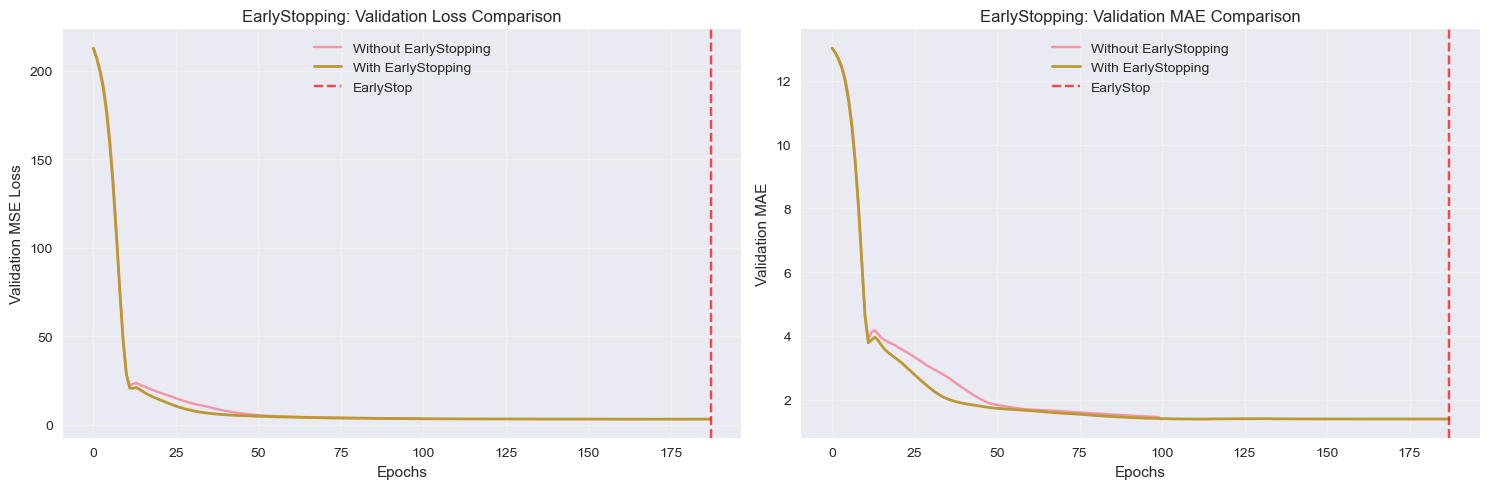


✅ EarlyStopping successfully implemented!
💡 Benefits: Prevents overfitting, saves computation time, finds optimal stopping point


In [28]:
# Q6: Add EarlyStopping for the neural network
from tensorflow.keras.callbacks import EarlyStopping

# Create ANN model with EarlyStopping
def create_ann_model_early_stopping():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(1,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])
    return model

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=15,           # Stop after 15 epochs without improvement
    restore_best_weights=True,  # Restore weights from best epoch
    verbose=1
)

# Create and train model with EarlyStopping
ann_model_es = create_ann_model_early_stopping()

print("🚀 Training ANN model with EarlyStopping...")
history_es = ann_model_es.fit(
    X_train_scaled, y_train,
    epochs=200,  # Set higher epochs since EarlyStopping will stop early
    batch_size=16,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
ann_es_train_loss, ann_es_train_mae = ann_model_es.evaluate(X_train_scaled, y_train, verbose=0)
ann_es_test_loss, ann_es_test_mae = ann_model_es.evaluate(X_test_scaled, y_test, verbose=0)

# Make predictions
y_pred_ann_es = ann_model_es.predict(X_test_scaled).flatten()
ann_es_mse = mean_squared_error(y_test, y_pred_ann_es)
ann_es_r2 = r2_score(y_test, y_pred_ann_es)

print(f"\n📊 ANN with EarlyStopping Performance:")
print(f"Training stopped at epoch: {len(history_es.history['loss'])}")
print(f"Best validation loss: {min(history_es.history['val_loss']):.4f}")
print(f"Test MSE: {ann_es_test_loss:.4f}")
print(f"Test R²: {ann_es_r2:.4f}")

# Compare with and without EarlyStopping
print(f"\n🔍 Comparison:")
print(f"ANN without EarlyStopping - Final epoch: 100, Test MSE: {ann_test_loss:.4f}")
print(f"ANN with EarlyStopping - Final epoch: {len(history_es.history['loss'])}, Test MSE: {ann_es_test_loss:.4f}")

# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Loss comparison
ax1.plot(history.history['val_loss'], label='Without EarlyStopping', alpha=0.7)
ax1.plot(history_es.history['val_loss'], label='With EarlyStopping', linewidth=2)
ax1.axvline(x=len(history_es.history['val_loss'])-1, color='red', linestyle='--', alpha=0.7, label='EarlyStop')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Validation MSE Loss')
ax1.set_title('EarlyStopping: Validation Loss Comparison')
ax1.legend()
ax1.grid(True, alpha=0.3)

# MAE comparison
ax2.plot(history.history['val_mae'], label='Without EarlyStopping', alpha=0.7)
ax2.plot(history_es.history['val_mae'], label='With EarlyStopping', linewidth=2)
ax2.axvline(x=len(history_es.history['val_mae'])-1, color='red', linestyle='--', alpha=0.7, label='EarlyStop')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Validation MAE')
ax2.set_title('EarlyStopping: Validation MAE Comparison')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figs/early_stopping_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ EarlyStopping successfully implemented!")
print("💡 Benefits: Prevents overfitting, saves computation time, finds optimal stopping point")

# Test Different Activation Functions (tanh, LeakyReLU)

🚀 Training models with different activation functions...

Training ReLU model...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Training tanh model...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

Training LeakyReLU model...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

📊 Activation Functions Comparison:
               MSE     MAE      R2
ReLU        3.6010  1.4890  0.9312
tanh       15.5145  2.5545  0.7038
LeakyReLU   3.6474  1.5122  0.9304


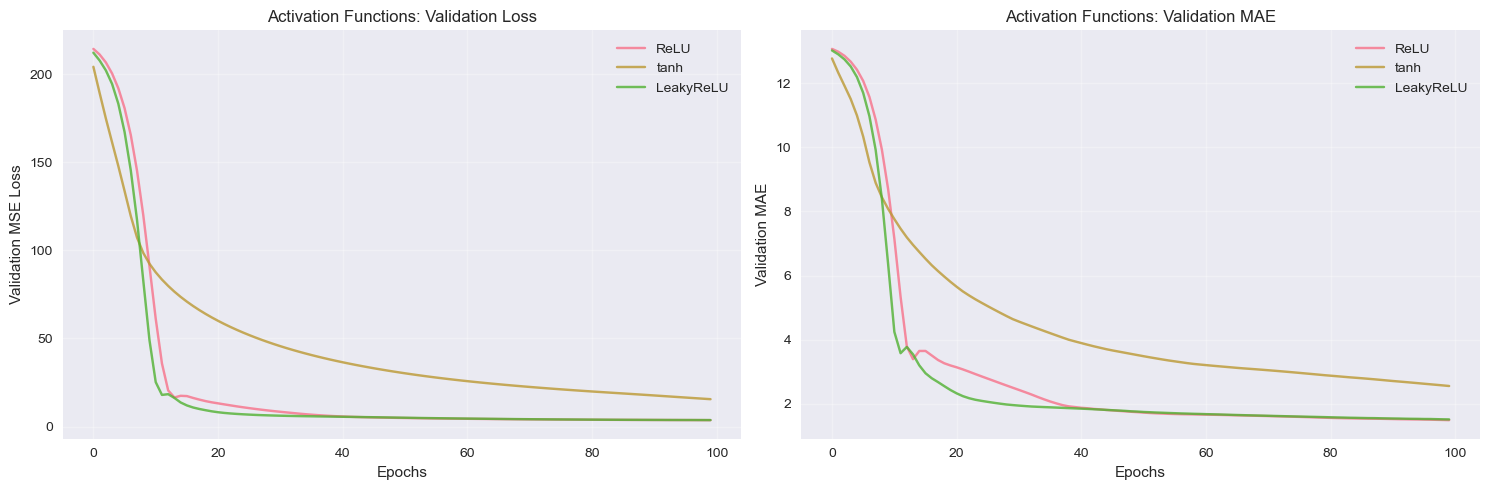


📈 Activation Functions Analysis:
• ReLU: Good for deep networks, can suffer from dying ReLU problem
• tanh: Output range [-1,1], zero-centered, can suffer from vanishing gradients
• LeakyReLU: Solves dying ReLU problem, allows small negative values
• Best choice depends on the specific problem and data distribution


In [29]:
# Q7: Test different activation functions (tanh, LeakyReLU)
from tensorflow.keras.layers import LeakyReLU

def create_ann_tanh():
    model = Sequential([
        Dense(64, activation='tanh', input_shape=(1,)),
        Dense(32, activation='tanh'),
        Dense(16, activation='tanh'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def create_ann_leaky_relu():
    model = Sequential([
        Dense(64),
        LeakyReLU(alpha=0.1),
        Dense(32),
        LeakyReLU(alpha=0.1),
        Dense(16),
        LeakyReLU(alpha=0.1),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def create_ann_relu():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(1,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Models to compare
models_activation = {
    'ReLU': create_ann_relu(),
    'tanh': create_ann_tanh(),
    'LeakyReLU': create_ann_leaky_relu()
}

# Train and evaluate each model
activation_results = {}
activation_histories = {}

print("🚀 Training models with different activation functions...")

for name, model in models_activation.items():
    print(f"\nTraining {name} model...")
    
    history = model.fit(
        X_train_scaled, y_train,
        epochs=100,
        batch_size=16,
        validation_data=(X_test_scaled, y_test),
        verbose=0
    )
    
    # Evaluate
    test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
    y_pred = model.predict(X_test_scaled).flatten()
    r2 = r2_score(y_test, y_pred)
    
    activation_results[name] = {
        'MSE': test_loss,
        'MAE': test_mae,
        'R2': r2
    }
    activation_histories[name] = history

# Display results
activation_df = pd.DataFrame(activation_results).T
print("\n📊 Activation Functions Comparison:")
print(activation_df.round(4))

# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Validation Loss comparison
for name, history in activation_histories.items():
    ax1.plot(history.history['val_loss'], label=name, alpha=0.8)

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Validation MSE Loss')
ax1.set_title('Activation Functions: Validation Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Validation MAE comparison
for name, history in activation_histories.items():
    ax2.plot(history.history['val_mae'], label=name, alpha=0.8)

ax2.set_xlabel('Epochs')
ax2.set_ylabel('Validation MAE')
ax2.set_title('Activation Functions: Validation MAE')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figs/activation_functions_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📈 Activation Functions Analysis:")
print("• ReLU: Good for deep networks, can suffer from dying ReLU problem")
print("• tanh: Output range [-1,1], zero-centered, can suffer from vanishing gradients")
print("• LeakyReLU: Solves dying ReLU problem, allows small negative values")
print("• Best choice depends on the specific problem and data distribution")

# Compare Performances on California Housing Dataset

🏠 Loading California Housing dataset...
Dataset shape: (20640, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: Median House Value

📊 Dataset Info:
Number of samples: 20640
Number of features: 8
Target range: 0.15 to 5.00

🔧 Training traditional models...

🧠 Training ANN model...
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step

📊 CALIFORNIA HOUSING - Model Comparison:
                                  MSE      R2
Linear Regression              0.5559  0.5758
Polynomial Regression (deg=2)  0.4643  0.6457
Ridge Regression               0.5559  0.5758
Lasso Regression               0.5483  0.5816
ElasticNet                     0.5500  0.5803
ANN                            0.2759  0.7894


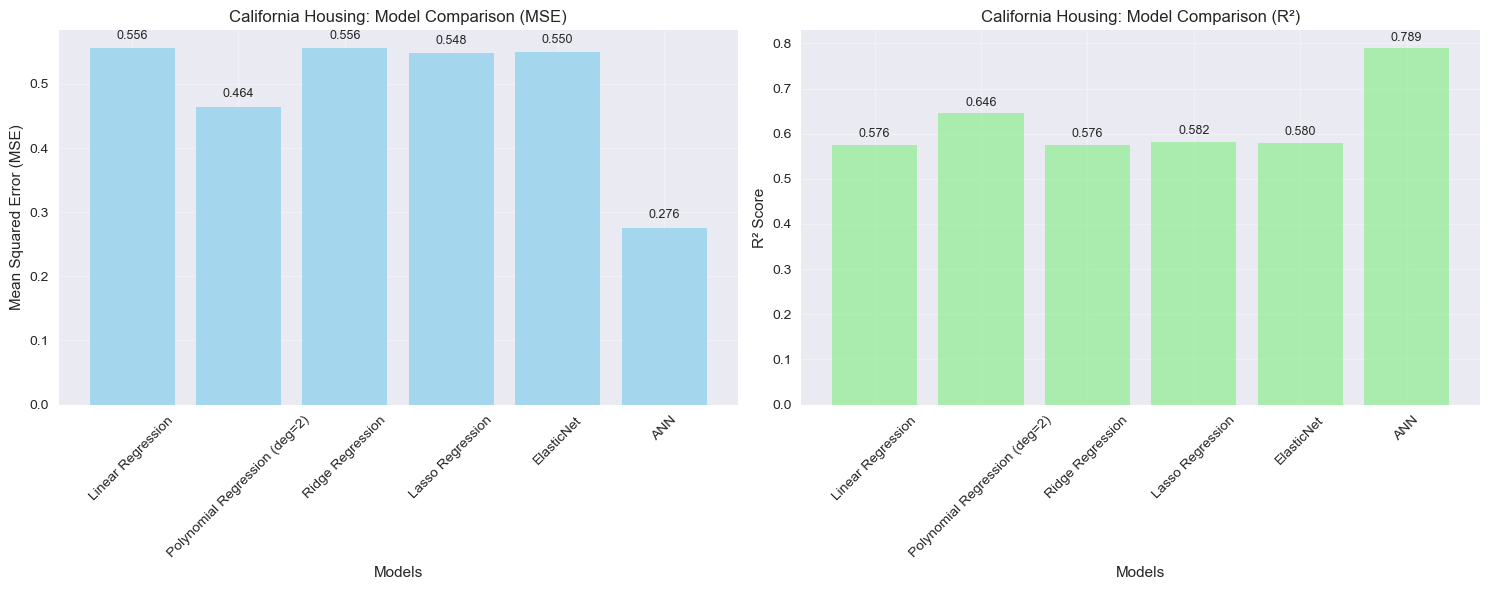


✅ California Housing dataset analysis completed!
📈 Key Insights:
• Real datasets often behave differently from synthetic data
• Feature scaling is crucial for good performance
• Regularization helps prevent overfitting with multiple features
• ANN can capture complex relationships but requires more tuning


In [31]:
# Q8: Compare performances on California Housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load California Housing dataset
print("🏠 Loading California Housing dataset...")
california = fetch_california_housing()
X_cal = california.data
y_cal = california.target
feature_names = california.feature_names

print(f"Dataset shape: {X_cal.shape}")
print(f"Features: {list(feature_names)}")
print(f"Target: Median House Value")

# Create DataFrame for exploration
df_california = pd.DataFrame(X_cal, columns=feature_names)
df_california['MedHouseVal'] = y_cal

# Display basic info
print(f"\n📊 Dataset Info:")
print(f"Number of samples: {X_cal.shape[0]}")
print(f"Number of features: {X_cal.shape[1]}")
print(f"Target range: {y_cal.min():.2f} to {y_cal.max():.2f}")

# Split the data
X_train_cal, X_test_cal, y_train_cal, y_test_cal = train_test_split(
    X_cal, y_cal, test_size=0.2, random_state=42
)

# Scale features
scaler_cal = StandardScaler()
X_train_cal_scaled = scaler_cal.fit_transform(X_train_cal)
X_test_cal_scaled = scaler_cal.transform(X_test_cal)

# Define all models to compare
models_california = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (deg=2)': Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('linear', LinearRegression())
    ]),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5)
}

# Train and evaluate traditional models
print("\n🔧 Training traditional models...")
results_california = {}

for name, model in models_california.items():
    if 'Polynomial' in name:
        model.fit(X_train_cal, y_train_cal)
        y_pred = model.predict(X_test_cal)
    else:
        model.fit(X_train_cal_scaled, y_train_cal)
        y_pred = model.predict(X_test_cal_scaled)
    
    mse = mean_squared_error(y_test_cal, y_pred)
    r2 = r2_score(y_test_cal, y_pred)
    
    results_california[name] = {'MSE': mse, 'R2': r2}

# Create and train ANN model
print("\n🧠 Training ANN model...")
def create_california_ann():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_cal_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

ann_california = create_california_ann()

# EarlyStopping for ANN
early_stopping_cal = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=0
)

history_california = ann_california.fit(
    X_train_cal_scaled, y_train_cal,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_cal_scaled, y_test_cal),
    callbacks=[early_stopping_cal],
    verbose=0
)

# Evaluate ANN
ann_cal_loss, ann_cal_mae = ann_california.evaluate(X_test_cal_scaled, y_test_cal, verbose=0)
y_pred_ann_cal = ann_california.predict(X_test_cal_scaled).flatten()
ann_cal_mse = mean_squared_error(y_test_cal, y_pred_ann_cal)
ann_cal_r2 = r2_score(y_test_cal, y_pred_ann_cal)

results_california['ANN'] = {'MSE': ann_cal_mse, 'R2': ann_cal_r2}

# Display results
results_cal_df = pd.DataFrame(results_california).T
print("\n📊 CALIFORNIA HOUSING - Model Comparison:")
print(results_cal_df.round(4))

# Create comparison visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# MSE comparison
models_names = list(results_california.keys())
mse_values = [results_california[name]['MSE'] for name in models_names]
r2_values = [results_california[name]['R2'] for name in models_names]

bars1 = ax1.bar(models_names, mse_values, color='skyblue', alpha=0.7)
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Squared Error (MSE)')
ax1.set_title('California Housing: Model Comparison (MSE)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars1, mse_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{value:.3f}', ha='center', va='bottom', fontsize=9)

# R² comparison
bars2 = ax2.bar(models_names, r2_values, color='lightgreen', alpha=0.7)
ax2.set_xlabel('Models')
ax2.set_ylabel('R² Score')
ax2.set_title('California Housing: Model Comparison (R²)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars2, r2_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{value:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('figs/california_housing_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ California Housing dataset analysis completed!")
print("📈 Key Insights:")
print("• Real datasets often behave differently from synthetic data")
print("• Feature scaling is crucial for good performance")
print("• Regularization helps prevent overfitting with multiple features")
print("• ANN can capture complex relationships but requires more tuning")